# Import packages and load datasets

In [3]:
import glob, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Dataset original
# df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('../dist/', "*.csv"))))
df = pd.read_csv('../dist/df_subset.csv')

In [16]:
# Datas
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')
df['year'] = [data.year for data in df['time']]
df['month'] = [data.month for data in df['time']]
df['day'] = [data.day for data in df['time']]
df['hour'] = [data.hour for data in df['time']]

# Dataset secundário
df_v2 = df[df.columns[1:]]

# Functions

In [6]:
def fnc_convert_data(valor):
    try:
        return time.mktime(valor.timetuple())
    except Exception as e:
        return 0 

# Exploratory data analysis (EDA)

In [17]:
# Teste para colunas vazias
df_na = df[[column for column in df if df[column].count() / len(df) >= 0.99]]

In [18]:
if pd.Series.tolist(df.columns) == pd.Series.tolist(df_na.columns):
    print("base sem null's! =)")
else:
    print("base com null's! =(")

base sem null's! =)


In [19]:
# Infos do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
time        100000 non-null datetime64[ns]
ca          100000 non-null object
unit        100000 non-null object
scp         100000 non-null object
station     99828 non-null object
linename    99828 non-null object
division    99828 non-null object
desc        100000 non-null object
entries     100000 non-null float64
exits       100000 non-null float64
year        100000 non-null int64
month       100000 non-null int64
day         100000 non-null int64
hour        100000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 10.7+ MB


In [20]:
# Descrição das features númericas do dataset
df.describe()

entries         exits      year     month            day  \
count  1.000000e+05  1.000000e+05  100000.0  100000.0  100000.000000   
mean   2.927970e+06  2.443422e+06    2010.0       4.0      18.298880   
std    3.096347e+06  6.509806e+06       0.0       0.0       0.987188   
min    0.000000e+00 -1.447243e+08    2010.0       4.0      17.000000   
25%    5.441925e+05  3.230530e+05    2010.0       4.0      17.000000   
50%    2.160288e+06  1.481380e+06    2010.0       4.0      18.000000   
75%    4.056736e+06  3.076883e+06    2010.0       4.0      19.000000   
max    3.156438e+07  3.303235e+08    2010.0       4.0      20.000000   

               hour  
count  100000.00000  
mean       10.24946  
std         6.64623  
min         0.00000  
25%         5.00000  
50%         9.00000  
75%        16.00000  
max        23.00000

In [21]:
# Leitura do cabeçalho
df.head()

time    ca  unit       scp        station linename division  \
0 2010-04-17 04:00:00  A002  R051  02-00-00  LEXINGTON AVE   456NQR      BMT   
1 2010-04-17 04:00:00  A002  R051  02-00-01  LEXINGTON AVE   456NQR      BMT   
2 2010-04-17 04:00:00  A002  R051  02-03-00  LEXINGTON AVE   456NQR      BMT   
3 2010-04-17 04:00:00  A002  R051  02-03-01  LEXINGTON AVE   456NQR      BMT   
4 2010-04-17 04:00:00  A002  R051  02-03-02  LEXINGTON AVE   456NQR      BMT   

      desc    entries      exits  year  month  day  hour  
0  REGULAR  2704717.0   928793.0  2010      4   17     4  
1  REGULAR  2697632.0   566683.0  2010      4   17     4  
2  REGULAR  1127722.0  3943492.0  2010      4   17     4  
3  REGULAR  2425570.0  3733289.0  2010      4   17     4  
4  REGULAR  2214633.0  3021589.0  2010      4   17     4

### Boxplot

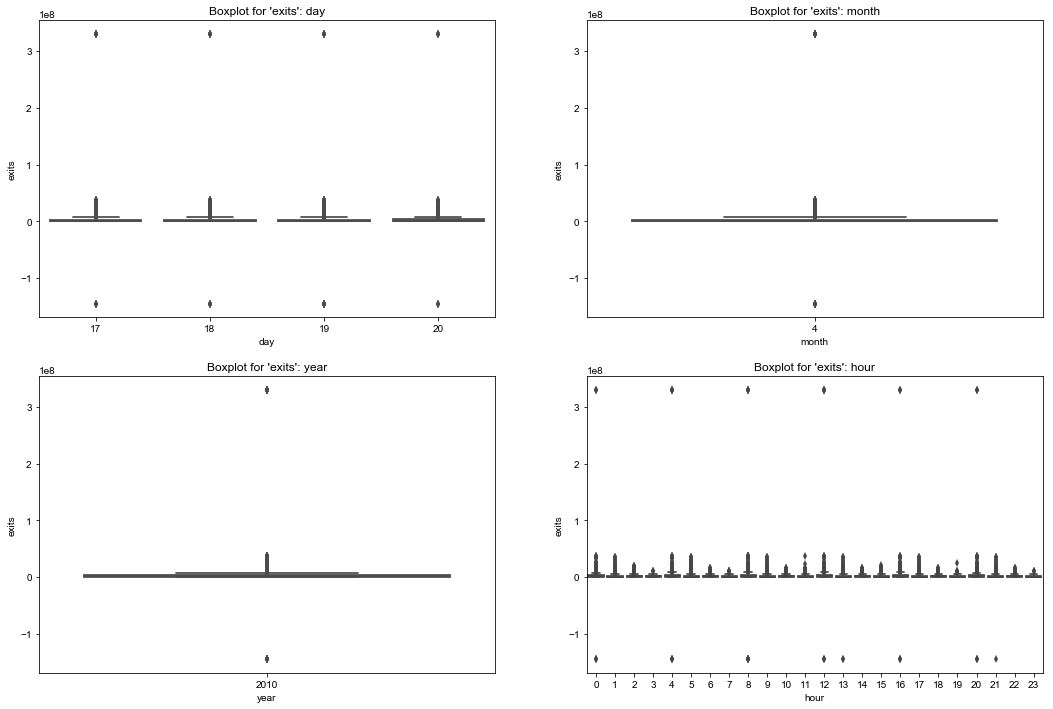

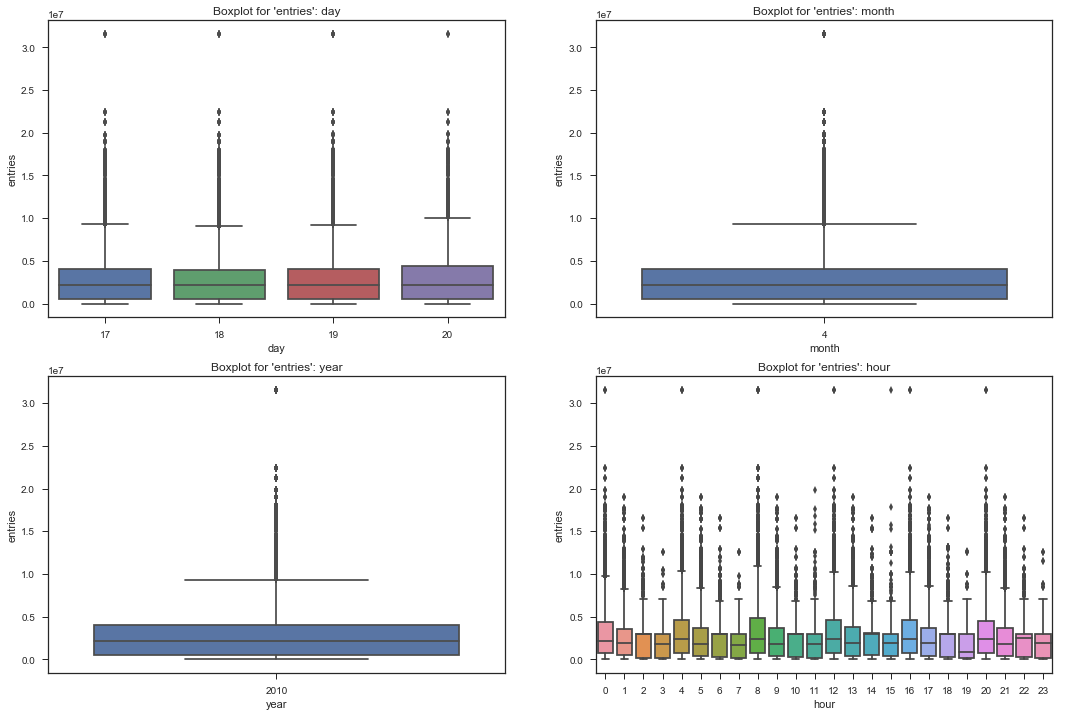

In [22]:
x_list = ['day','month','year','hour']
y_list = ['exits','entries']

for y in y_list:
    fig, ax = plt.subplots(int(len(x_list)/2), 2, figsize = (18, 12))

    for i, ax in enumerate(fig.axes):
        sns.set(style="ticks", palette="deep")
        sns.boxplot(
            x=x_list[i], 
            y=y,
            data=df,
            ax=ax
        ).set_title("Boxplot for '"+y+"': "+x_list[i])

### Convert features to Categorical

In [23]:
# Conversão de object para númerico
for cat_feature in df_v2.select_dtypes(include=['object']).columns:
    df_v2[cat_feature] = pd.Categorical(df_v2[cat_feature]).codes

C:\Users\mdabati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
ca          100000 non-null int16
unit        100000 non-null int16
scp         100000 non-null int16
station     100000 non-null int16
linename    100000 non-null int8
division    100000 non-null int8
desc        100000 non-null int8
entries     100000 non-null float64
exits       100000 non-null float64
year        100000 non-null int64
month       100000 non-null int64
day         100000 non-null int64
hour        100000 non-null int64
dtypes: float64(2), int16(4), int64(4), int8(3)
memory usage: 5.6 MB


In [25]:
# Resumo de cada feature
for coluna in df_v2.columns:
    print(df_v2[coluna].describe())
    print('\n\n')

count    100000.000000
mean        362.326550
std         197.121603
min           0.000000
25%         223.000000
50%         364.000000
75%         525.000000
max         720.000000
Name: ca, dtype: float64



count    100000.000000
mean        174.634260
std         142.077354
min           0.000000
25%          41.000000
50%         141.000000
75%         280.000000
max         461.000000
Name: unit, dtype: float64



count    100000.000000
mean         48.758480
std          48.020388
min           0.000000
25%           2.000000
50%          45.000000
75%          94.000000
max         203.000000
Name: scp, dtype: float64



count    100000.000000
mean        193.772200
std         120.091579
min          -1.000000
25%          79.000000
50%         187.000000
75%         304.000000
max         376.000000
Name: station, dtype: float64



count    100000.000000
mean         42.176910
std          32.876931
min          -1.000000
25%          14.000000
50%          32.000000
75%   

### Histogram

In [37]:
df_hist = df_v2.sort_index(axis=1)

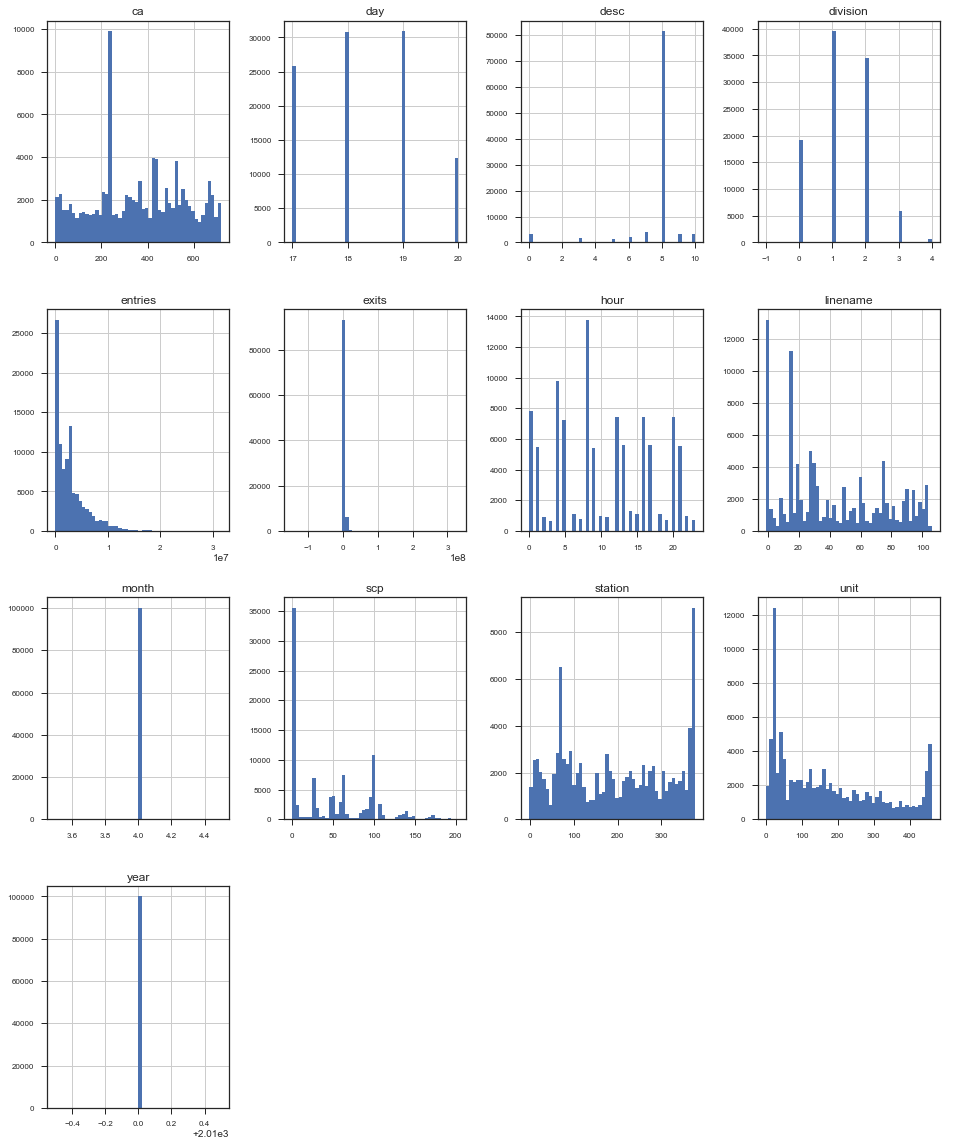

In [39]:
df_hist.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Correlation

<Figure size 792x648 with 0 Axes>

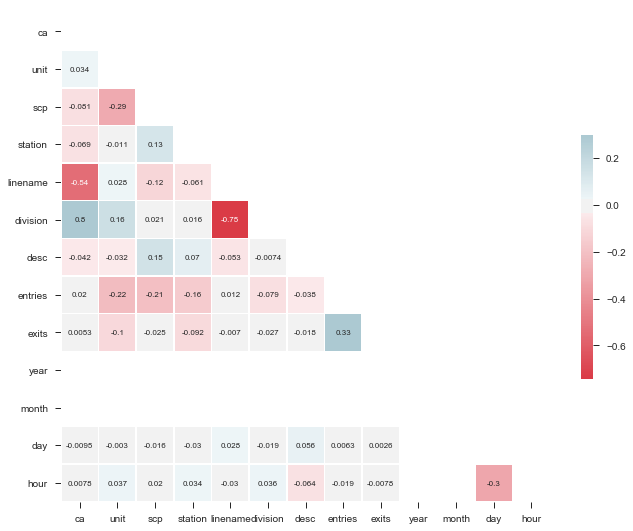

In [42]:
corr = df_v2.corr()
plt.figure(figsize=(11, 9))

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Figure
f, ax = plt.subplots(figsize=(11, 9))

# Colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr, 
            cmap=cmap, 
            mask=mask,
            vmax=.3,             
            linewidths=.5,
            center=0,
            annot=True, 
            annot_kws={"size": 8}, 
            square=True, 
            cbar_kws={"shrink": .5});

In [46]:
# Tabela de correlação
corr

ca      unit       scp   station  linename  division  \
ca        1.000000  0.034274 -0.081013 -0.069011 -0.539930  0.803471   
unit      0.034274  1.000000 -0.287051 -0.011300  0.028476  0.163565   
scp      -0.081013 -0.287051  1.000000  0.129826 -0.115728  0.020564   
station  -0.069011 -0.011300  0.129826  1.000000 -0.061003  0.015748   
linename -0.539930  0.028476 -0.115728 -0.061003  1.000000 -0.745493   
division  0.803471  0.163565  0.020564  0.015748 -0.745493  1.000000   
desc     -0.042250 -0.031823  0.148229  0.069951 -0.053001 -0.007390   
entries   0.020078 -0.215252 -0.206080 -0.157150  0.011828 -0.078672   
exits     0.005333 -0.102479 -0.025448 -0.092233 -0.006990 -0.026748   
year           NaN       NaN       NaN       NaN       NaN       NaN   
month          NaN       NaN       NaN       NaN       NaN       NaN   
day      -0.009457 -0.003030 -0.016295 -0.030356  0.028440 -0.019098   
hour      0.007804  0.037323  0.019754  0.033733 -0.030272  0.035805   

              desc   entries     exits  year  month       day      hour  
ca       -0.042250  0.020078  0.005333   NaN    NaN -0.009457  0.007804  
unit     -0.031823 -0.215252 -0.102479   NaN    NaN -0.003030  0.037323  
scp       0.148229 -0.206080 -0.025448   NaN    NaN -0.016295  0.019754  
station   0.069951 -0.157150 -0.092233   NaN    NaN -0.030356  0.033733  
linename -0.053001  0.011828 -0.006990   NaN    NaN  0.028440 -0.030272  
division -0.007390 -0.078672 -0.026748   NaN    NaN -0.019098  0.035805  
desc      1.000000 -0.038479 -0.017832   NaN    NaN  0.056075 -0.064223  
entries  -0.038479  1.000000  0.328933   NaN    NaN  0.006281 -0.018547  
exits    -0.017832  0.328933  1.000000   NaN    NaN  0.002615 -0.007805  
year           NaN       NaN       NaN   NaN    NaN       NaN       NaN  
month          NaN       NaN       NaN   NaN    NaN       NaN       NaN  
day       0.056075  0.006281  0.002615   NaN    NaN  1.000000 -0.304921  
hour     -0.064223 -0.018547 -0.007805   NaN    NaN -0.304921  1.000000

### Linear Regression - 'entries' vs featuare

In [ ]:
df_v3 = df_v2
y_list = ['entries','exits']

for y in y_list:
    fig, ax = plt.subplots(round(len(df_v3.columns) / 3), 3, figsize = (18, 12))

    for i, ax in enumerate(fig.axes):
        if i < len(df_v3.columns) - 1:        
            sns.regplot(x=df_v3[df_v3.columns[i]],y='entries', data=df_v3, ax=ax).set_title("LR for '"+y+"' vs "+df_v3.columns[i])